<a href="https://colab.research.google.com/github/BrunoSorrilha/Python/blob/main/2_ExemploAnalisedasInscricoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Dados Simples - Inscrições do Curso

### Após a Aula introdutória vamos ver como colher algumas informações Simples Usando Python

In [ ]:
import pandas as pd #Biblioteca responsável para fazer a leitura e impressão de bases de dados

### Veja neste link como armazenar uma planilha excel no Github para usar como base de dados no COLAB

In [ ]:
url = 'https://github.com/profcintiapinho/laboratorio_ia/blob/main/respostasalunos.xlsx?raw=true' #pega o caminho do arquivo excel no github
planilha = "respostas" #identifica a planilha que está os dados
base = pd.read_excel(url,planilha) #pega o caminho e a planilha exata e armazena na variável

In [ ]:
base

,Turma,interesse,computador,motivacao
0,Novo Tec - Administração(Tarde),Noite,Sim,Quero estar mais liga e aprender muito mais s...
1,Contabilidade - Noite,Tarde,Sim,conseguir automatizar alguns processos no meu ...
2,Contabilidade - Noite,Tarde,Sim,"Obter um pouco de conhecimento nessa área, a q..."
3,Novo Tec - Recursos Humanos (Manhã),Noite,Sim,Porque o python é uma linguagens de programaçã...
4,Contabilidade - Noite,Tarde,Sim,quero aprimorar meus conhecimentos
...,...,...,...,...
56,Logistica - Noite,Tarde,não,Ter um curso extracurricular pra melhorar meu ...
57,Logistica - Noite,Tarde,não,Ter um curso extracurricular pra melhorar meu ...
58,Novo Tec - Informática (Manhã),Tarde,Sim,Busca por conhecimentos que possam agregar na ...
59,Novo Tec - Informática (Manhã),Noite,Sim,Ampliar meus conhecimentos na área de informática


In [ ]:
import matplotlib.pyplot as plt #biblioteca para gerar gráficos
import seaborn as sns #biblioteca para visualizar gráficos

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


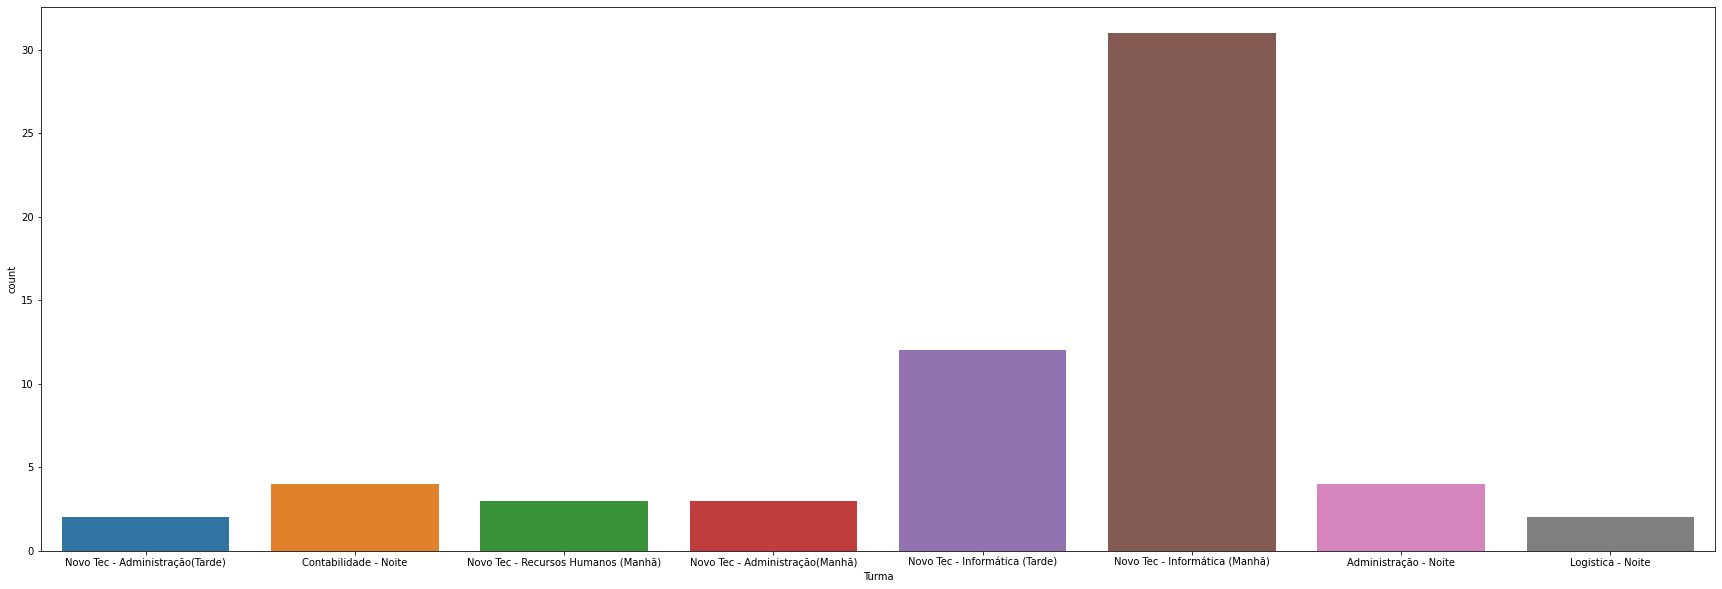

In [ ]:
plt.subplots(figsize=(30, 10))
sns.countplot(base.Turma);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Alunos possuem computadores?')

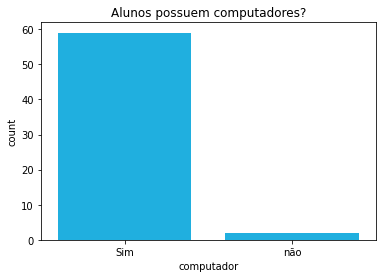

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(base['computador'], color='#00BFFF');
plt.title('Alunos possuem computadores?')

In [ ]:
base['interesse'].value_counts()

Tarde    31
Noite    30
Name: interesse, dtype: int64

In [ ]:
tarde = base.interesse.value_counts()['Tarde']
noite = base.interesse.value_counts()['Noite']

In [ ]:
x = ["Tarde", "Noite"]
y = [tarde, noite]

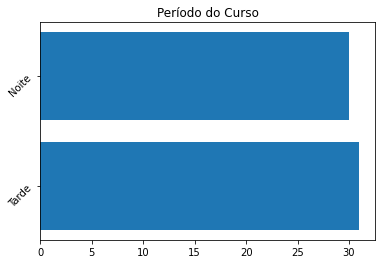

In [ ]:
plt.barh(x, y)
plt.yticks(rotation=45)
plt.title('Período do Curso')
plt.show()

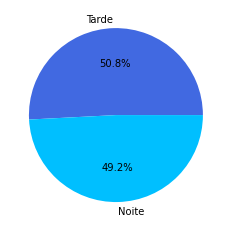

In [ ]:
cores = ['#4169E1','#00BFFF','#00008B']
plt.pie(y, labels=x, autopct='%1.1f%%', colors = cores)
plt.show()

In [ ]:
import spacy
import re

In [ ]:
!python -m spacy download pt_core_news_sm

2023-09-01 11:02:29.317064: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 37.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


In [ ]:
pln = spacy.load('pt_core_news_sm')

# **O que são Stop-Words**
Stop-words são aplavras da lingua portuguesa que não possuem umsignificado próprio
Exemplo: verbos

In [ ]:
from spacy.lang.pt.stop_words import STOP_WORDS
stop_words = STOP_WORDS

In [ ]:
import string
pontuacoes = string.punctuation
pontuacoes

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def preprocessamento(text):
    result = []
    pos_tag = ['ADJ', 'NOUN', 'VERB', 'PROPN'] # escolhendo apenas adjetivos, substantivos e verbos , 'VERB'
    texto = re.sub(u'[^a-zA-Z0-9áéíóúÁÉÍÓÚâêîôÂÊÎÔãõÃÕçÇ: ]', '', text )
    doc = pln(texto.lower()) # Transformando em minúsculo
    for token in doc:
        # 3
        if(token.text in stop_words or token.text in pontuacoes):
            continue
        # 4
        if(token.pos_ in pos_tag):
            result.append(token.text)

        texto = ' '.join([str(elemento) for elemento in result if not elemento.isdigit()])


    #return result # 5
    return texto # 5

In [ ]:
base.motivacao=base.motivacao.astype(str)
base['limpa'] = base['motivacao'].apply(preprocessamento)

In [ ]:
base

,Turma,interesse,computador,motivacao,limpa
0,Novo Tec - Administração(Tarde),Noite,Sim,Quero estar mais liga e aprender muito mais s...,liga aprender tecnologia
1,Contabilidade - Noite,Tarde,Sim,conseguir automatizar alguns processos no meu ...,conseguir automatizar processos trabalho
2,Contabilidade - Noite,Tarde,Sim,"Obter um pouco de conhecimento nessa área, a q...",obter conhecimento solicitado mercado trabalho
3,Novo Tec - Recursos Humanos (Manhã),Noite,Sim,Porque o python é uma linguagens de programaçã...,python linguagens programação fácil executar p...
4,Contabilidade - Noite,Tarde,Sim,quero aprimorar meus conhecimentos,aprimorar conhecimentos
...,...,...,...,...,...
56,Logistica - Noite,Tarde,não,Ter um curso extracurricular pra melhorar meu ...,curso extracurricular melhorar currículo
57,Logistica - Noite,Tarde,não,Ter um curso extracurricular pra melhorar meu ...,curso extracurricular melhorar currículo
58,Novo Tec - Informática (Manhã),Tarde,Sim,Busca por conhecimentos que possam agregar na ...,busca conhecimentos possam agregar vida
59,Novo Tec - Informática (Manhã),Noite,Sim,Ampliar meus conhecimentos na área de informática,ampliar conhecimentos informática


In [ ]:
motivo = base['limpa'].values
juntandotudo = ''
for sentimento in motivo:
  juntandotudo += sentimento+" "

In [ ]:
juntandotudo

'liga aprender tecnologia conseguir automatizar processos trabalho obter conhecimento solicitado mercado trabalho python linguagens programação fácil executar projetos tamanhos sabendo python aprimorar conhecimentos aprimorar conhecimentos venho interessando tecnologia conhecimento adquirir conhecimentos agregar conhecimentos currículo achei interessante curso melhorar conhecimento python interessei gosto programação estudei python conhecimento indicação documentário coded bias desenvolvi interesse expandir conhecimentos futuro melhor incrementar currículo interesse interesse explorar áreas informática estudei python motivos conhecer mexe funciona adquirir conhecimento busco melhor capacitação ingressar mercado trabalho interesse tema curso gosto aprender coisas acredito oportunidade aparece agarrada tema curso desperta interesse experiência area interesse aprender tecnologias atuais ampliar conhecimento amo áreae decidindo aprender fundamental aprender coisas tornar profissional quali

In [ ]:
banana= '''Oi meu nome é Samara, tenho 14 anos (Teria se estivesse viva), morri aos 13 em Cascavel-PR. Eu andava de bicicleta Quando não pude desviar de um arame farpado. O pior foi que o dono do lote não quis me ajudar, riu bastante mim após agonizar por 2 horas enroscada no arame eu faleci, através dessa mensagem eu peço que façam com que eu possa descançar em paz. Envie isso para 20 comunidades e minha alma estara sendo salva por você e pelos outros 20 que receberão. Caso não repasse essa mensagem vou visitar-lhe hoje a noite assim vc poderá conhecer o tal arame bem de pertinho. Dia 15 de Julho Mariana resolveu rir dessa mensagem, uma noite depois ela sumiu sem deixar vestigios. O mesmo aconteceu com Kare dia 18 de Outubro. Não Quebre essa corrente por favor, a não ser que queira sentir a minha presença Eu tenho uma dúvida,Eu tenho que jogar FIFA,FIFA 2,FIFA 3,FIFA 4,FIFA 5,FIFA 6,FIFA 7,FIFA 8,FIFA 9,FIFA 10,FIFA 11,FIFA 12,FIFA 13,FIFA 14,FIFA 15,FIFA 16,FIFA 17,FIFA 18,FIFA 19,FIFA 20,FIFA 21 e FIFA 22 para entender a história de FIFA 23? vsf odeio puberdade aaaaaaaaaaaaaa serio eu so penso em sexo, tipo sexp 24h SEXO SEXO SEXO SEXO SEXO AAAAAAAAAAAAAAA serio as vezes eu to na aula e imagino 1929392 pirocas enfiadas dentro de mim Q PDIOOOOOO E EU NEM GOSTO DESSAS COISAS DEUS PQ H JAMES 🗣️🗣️🗣️
EU QUERO UMA SALADA DE FRUATÃ 🥗🥵🥭🍍🍌
olha que habilidade 🧐🏂
olha que habilidade 🥵⚽

eu quero uma salada de fruta James 🥗🍍🍉🚶‍♂️
no capricho 👌

de 5 🖐️ de 7 🖐️✌️ de 10 🖐️🖐️
me dá uma de 5 🖐️
aqui tá na mão 🫴🤵‍♂️🍹

iiiiisso James 😋
muito obrigado 🤝 Recentemente eu descobri que uma das minhas ex-namoradas estava recebendo informações sobre a minha vida pessoal e foi ai que eu comecei a desconfiar de alguns dos meus contatos do WhatsApp e foi ai que eu me lembrei do plano do Lawliet em descobrir a verdadeira região do Kira 📞👦🏻-Alô e a polícia

📞👮🏻-Sim qual e a denuncia

📞👦🏻-Venha imediatamente tem muito gente morta

📞👮🏻-Estamos indo,  onde Vc estar?

📞😆-No cemitério kkkkkkkkkkkkkkkkk

📞😡-Filho da XANAINA

2 Minutos Depois

📞😫-Alô é a Polícia

📞👮🏻-Sim, Qual e a denúncia
'''

In [ ]:
banana= preprocessamento(banana)

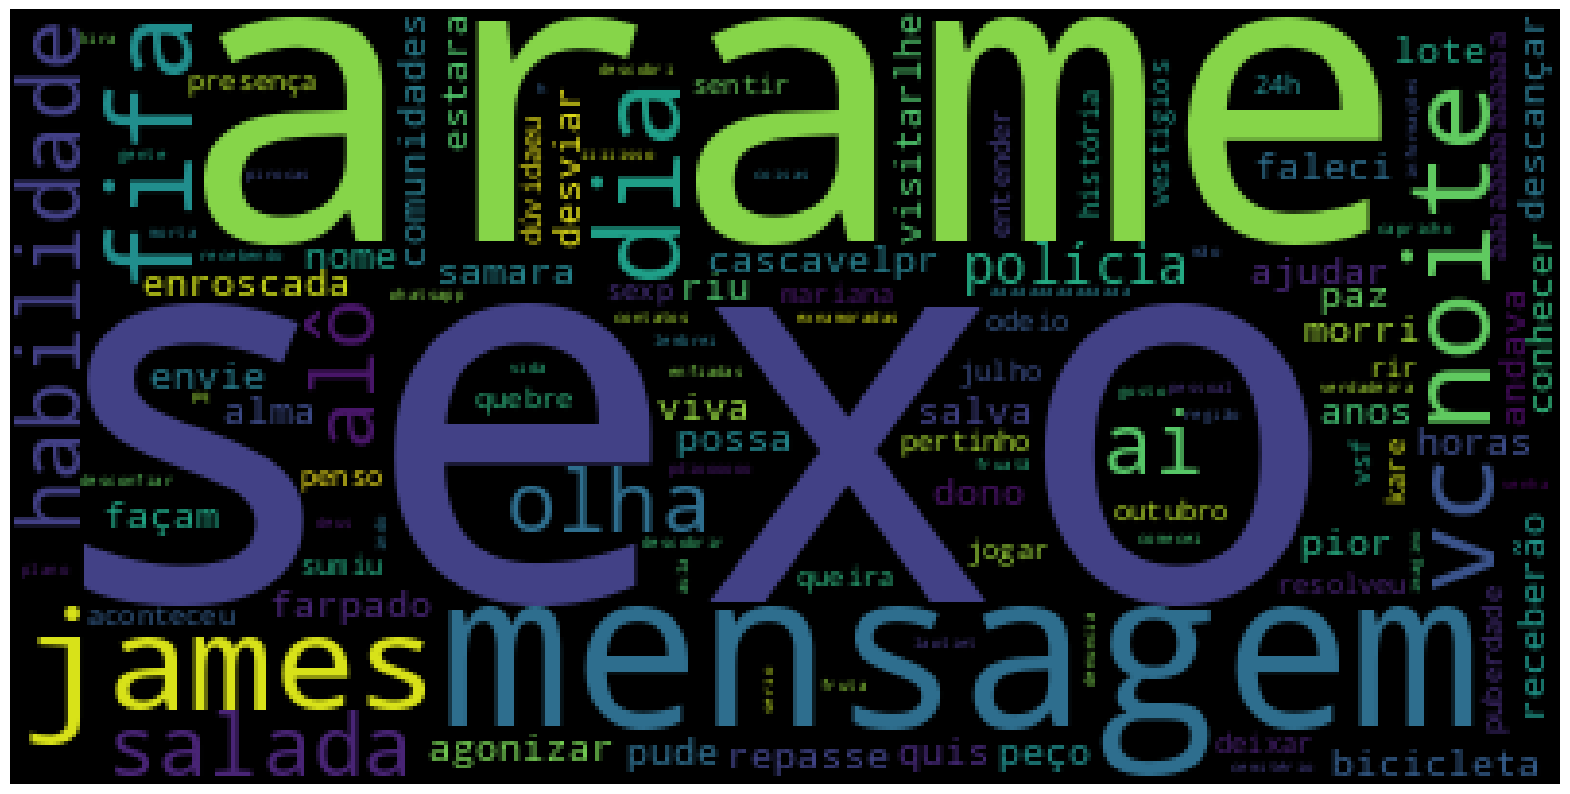

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.axis('off')
plt.imshow(WordCloud().generate(banana))